In [14]:
import os
import random

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [12]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://storage.googleapis.com]87[Files: 0  Bytes: 0  [0 B/s] Re]87Saving '101_food_classes_10_percent.zip'
87101_food_classes_10_   0% [>                             ]  238.74K    --.-KB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87[Files: 0  Bytes: 0  [0 B/s] Re]87101_food_classes_10_   0% [>                             ]    8.04M    7.81MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87101_food_classes_10_   0% [>                             ]   12.40M    6.08MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87101_food_classes_10_   1% [>                             ]   23.50M    7.75MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87101_food_classes_10_   2% [>                             ]   32.65M    8.10MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87101_food_classes_10_   2% [>                             ]   37.28M    7.40MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87101_food_classes_10_   2% [>                             ]   41.56M    6.88MB/s87[Files: 0 

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "../data/101_food_classes_10_percent/101_food_classes_10_percent/train/"
test_dir = "../data/101_food_classes_10_percent/101_food_classes_10_percent/test/"
import pickle

with open("../models/classes_101","rb") as file:
    classes = pickle.load(file)
model = tf.keras.models.load_model("../models/101_classes_10_percent_data_model_2_better.keras")

In [49]:
import random
import matplotlib.image as mpimg
def random_image():
  target_class = random.choice(classes)
  target_dir = train_dir + target_class
  random_image = random.choice(os.listdir(target_dir))
  random_image_path = target_dir + "/" + random_image
  img  = mpimg.imread(random_image_path)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  plt.show()
  return img


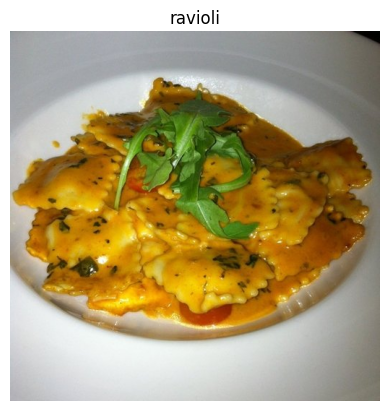

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: edamame with probability 0.34


In [ ]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input,decode_predictions

# random image is checked for sample if you want to check for some real image modify accordingly
img = random_image()
img_resized = np.array(tf.image.resize(img, (224, 224)))
x = np.expand_dims(img_resized, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
predicted_class_idx = np.argmax(preds, axis=1)[0]
predicted_class_label = classes[predicted_class_idx]

print(f'Predicted class: {predicted_class_label} with probability {preds[0][predicted_class_idx]:.2f}')

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster